# Latihan: Linear Regression vs Polynomial Regression (tanpa Pipeline)
Notebook ini menunjukkan cara memakai `LinearRegression` biasa dan **Polynomial Regression tanpa `Pipeline`** (manual memakai `PolynomialFeatures`).

Yang penting:
- `LinearRegression` menerima input fitur berbentuk array 2D: `(n_samples, n_features)`
- Untuk polynomial, kita ubah dulu `X` → fitur polinomial dengan `PolynomialFeatures`, lalu baru fit `LinearRegression` pada fitur hasil transformasi.

## Contoh simpel: $y = x^2 + 5x + 5$
Di bawah ini kita:
1) buat 100 data dari fungsi tersebut,
2) scatter plot datanya,
3) fit Polynomial Regression (degree=2) **tanpa Pipeline**,
4) plot kurva prediksinya.

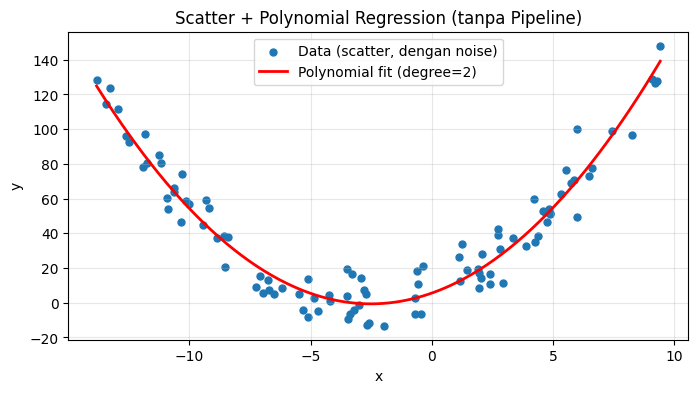

In [46]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# 1) Buat data 100 buah
rng = np.random.default_rng(42)
X = rng.uniform(-14, 10, size=100).reshape(-1, 1)  # bentuk 2D

# Rumus dasar: y = x^2 + 5x + 5
base_y = (X[:, 0] ** 2) + (5 * X[:, 0]) + 5

# Bikin konstanta '+5' jadi berubah-ubah (noise aditif)
noise_std = 10  # silakan coba: 2, 5, 10
noise = rng.normal(0, noise_std, size=X.shape[0])
y = base_y + noise

# 2) Fit polynomial degree=2 TANPA pipeline
degree = 2
poly = PolynomialFeatures(degree=degree, include_bias=False)
X_poly = poly.fit_transform(X)

model = LinearRegression()
model.fit(X_poly, y)

# 3) Bikin garis prediksi yang halus (pakai x yang terurut)
X_line = np.linspace(X.min(), X.max(), 300).reshape(-1, 1)
X_line_poly = poly.transform(X_line)
y_line_pred = model.predict(X_line_poly)

# 4) Plot scatter + plot hasil polynomial
plt.figure(figsize=(8, 4))
plt.scatter(X[:, 0], y, s=25, label='Data (scatter, dengan noise)')
plt.plot(X_line[:, 0], y_line_pred, linewidth=2, label=f'Polynomial fit (degree={degree})', color='red')
plt.title('Scatter + Polynomial Regression (tanpa Pipeline)')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True, alpha=0.3)
plt.legend()
plt.show()